# Librerias

In [1]:
import os
#import seaborn as sns
import pandas as pd
import warnings
import statsmodels.api as sm
from tabulate import tabulate
import matplotlib.patches as patches
import samplics
#import numpy as np
from statsmodels.discrete.discrete_model import Logit
import statsmodels.formula.api as smf

warnings.filterwarnings("ignore", category=FutureWarning)
from utils import *

# Modulos

###### MODULO1
- `P1121`: ¿Cuál es el tipo de alumbrado que tiene su hogar?  1 Electricidad
- `p1142`: u hogar tiene : ¿ Teléfono Celular ?               1 Teléfono Celular
- `p1143`: u hogar tiene : ¿ Conexión a TV cable o satelital? 1 Conexión a TV cable o satelital
- `p1144`: u hogar tiene : ¿ Conexión a Internet?             1 Conexión a Internet
##### MODULO2
- `p203`: ¿Cuál es la relación de parentesco con el jefe del hogar?   0 Panel (No Presente el año actual) 1 Jefe(a) 2 Esposa(o)/compañero(a) 3 Hijo(a)/Hijastro(a) 4 Yerno/Nuera 5 Nieto(a) 6 Padres/Suegros 7 Otros parientes 8 Trabajador Hogar 9 Pensionista 10 Otros no parientes 11 Hermano(a)
- `p204`:¿Es miembro del hogar? 1 Si  2 No
- `p206`: ¿ Está presente en el hogar 30 días o más ? 1 Si  2 No
- `p207`: Sexo 1 Hombre 2 Mujer
- `p208a`: ¿ Qué edad tiene en años cumplidos ? - En años
##### MODULO3
- `p300a`: ¿ Cuál es el idioma o lengua materna que aprendió en su niñez ? 1 Quechua 2 Aimara 3 Otra lengua nativa 4 Castellano 6 Portugués 7 Otra lengua extranjera
8 No escucha/no habla 9 Lengua de señas peruanas 10 Ashaninka 11 Awajun/Aguaruna 12 Shipibo-Konibo 13 Shawi/Chayahuita 14 Matsigenka/Machiguenga 15 Achuar
- `p301a`: ¿ Cuál es el último año o grado de estudios y nivel que aprobó ? - Nivel 1 Sin nivel 2 Educaion inicial 3 Primaria incompleta 4 Primaria completa
5 Secundaria Incompleta 6 Secundaria completa 7 Superior no universitaria incompleta 8 Superior no Universitaria completa 9 Superior Universitaria Incompleta
10 Superior Universitaria Completa 11 Maestria/doctorado 12 Básica especial 99 Missing value
- `p301b`: ¿ Cuál es el último año o grado de estudios y nivel que aprobó ? - Año 99 Missing value
- `p301c`: ¿ Cuál es el último año o grado de estudios y nivel que aprobó ? - Grado 9 Missing value
- `p307a1`: A través de que medios accede al contenido de las clases a distancia: Televisión  1 Televisión
- `p307a2`: A través de que medios accede al contenido de las clases a distancia: Radio/equipo de sonido 2 Radio/equipo de sonido
- `p307a3`: A través de que medios accede al contenido de las clases a distancia: Plataforma virtual/página web 3 Plataforma virtual/página web
- `p307a4`: A través de que medios accede al contenido de las clases a distancia: otro 4 Otro
- `p307a4_5`: A través de que medios accede al contenido de las clases a distancia: WhatsApp 5 WhatsApp
- `p307a4_6`: A través de que medios accede al contenido de las clases a distancia: Correo electrónico 6 Correo electrónico
- `p307a4_7`: A través de que medios accede al contenido de las clases a distancia: Llamada telefónica 7 Llamada telefónica
- `p307b1`: A través de que medios accede al contenido de las clases a distancia: Interacción con el profesor 1 Interacción con el profesor
- `p307b2`: A través de que medios accede al contenido de las clases a distancia: Videos  2 Videos
- `p307b3`: A través de que medios accede al contenido de las clases a distancia: Documentos(Textos, cuadros etc.) 3 Documentos(Textos, cuadros etc.)
- `p307b4`:  A través de que medios accede al contenido de las clases a distancia: Otro 4 Otro
- `p307b4_5`: A través de que medios accede al contenido de las clases a distancia: Mensajes de audio 5 Mensajes de audio
- `p307b4_6`: A través de que medios accede al contenido de las clases a distancia: Mensajes de texto  6 Mensajes de texto
- `p307b4_7`: A través de que medios accede al contenido de las clases a distancia: Sin acompañamiento al estudiante 7 Sin acompañamiento al estudiante
- `p308a`: ¿Cuál es el grado o año de estudios al que asiste ? - Nivel 1 Educación Inicial 4 Superior No Universitaria 5 Superior Universitaria 6 Maestria/Doctorado 7 Básica especial 9 Missing value
- `p308b`: ¿Cuál es el grado o año de estudios al que asiste ? - Año 9 Missing value
- `p308c`: ¿ Cuál es el grado o año de estudios al que asiste ? - Grado
- `p308d`: ¿ Cuál es el grado o año de estudios al que asiste ? – Centro de estudios 1 Estatal 2 No estatal
- `p314a`: En el mes anterior, ¿ Ud. hizo uso del Servicio de Internet? 1 Si 2 No 9 Missing value
- `p314b_1`: En el mes anterior, ¿Usó Ud., el Servicio de Internet en: El hogar? 1 El Hogar
- `p314b_2`: En el mes anterior, ¿Usó Ud., el Servicio de Internet en: El trabajo 1 El Trabajo
- `p314b_3`: En el mes anterior, ¿Usó Ud., el Servicio de Internet en: Un establecimiento educativo 1 Establecimiento educativo
- `p314b_4`: En el mes anterior, ¿Usó Ud., el Servicio de Internet en: Una cabina pública 1 Cabina Pública
- `p314b_5`: En el mes anterior, ¿Usó Ud., el Servicio de Internet en: En casa de otra persona 1 En casa de otra persona
- `p314b_6`: En el mes anterior, ¿Usó Ud., el Servicio de Internet en: Otro 1 Otro
- `p314b_7`: En el mes anterior, ¿Usó Ud., el Servicio de Internet en: Acceso móvil a Internet 1 Acceso móvil a Internet
- `p314b1_1`: En el mes anterior,el servicio de Internet lo usó a través de una/un: 1 Computadora
- `p314b1_2`: En el mes anterior,el servicio de Internet lo usó a través de una/un: 1 Laptop
- `p314b1_8`: En el mes anterior,el servicio de Internet lo usó a través de una/un: 1 Celular sin plan de datos
- `p314b1_9`: En el mes anterior,el servicio de Internet lo usó a través de una/un: 1 Celular con plan de datos
- `p314b1_6`: En el mes anterior,el servicio de Internet lo usó a través de una/un: 1 Tablet
- `p314b1_7`: En el mes anterior,el servicio de Internet lo usó a través de una/un: 1 Otro
- `p314d`:  ¿Ud., usa Internet al menos: 1 Una vez al dia? 2 Una vez a la semana? 3 Una vez al mes? 4 Cada 2 meses o más?
- `p316_1`: ¿Usó el Internet para: Obtener información 1 Si 2 No
- `p316_2`: ¿Usó el Internet para: Comunicarse (e-mail, chat, etc,) 1 Si 2 No
- `p316_3`: ¿Usó el Internet para: Comprar productos y/o servicios 1 Si 2 No
- `p316_4`: ¿Usó el Internet para: Operaciones de banca electrónica 1 Si 2 No
- `p316_5`: ¿Usó el Internet para: Educación formal y actividades de capacitación 1 Si 2 No
- `p316_6`: ¿Usó el Internet para: Transacciones (interactuar) con organizaciones estatales/autoridades públicas 1 Si 2 No
- `p316_7`: ¿Usó el Internet para: Actividades de entretenimiento 1 Si 2 No
- `p316_8`: ¿Usó el Internet para: Vender productos y/o servicios 1 Si 2 No
- `p316_12`: ¿Usó el Internet para: descarga de antivirus/aplicativos/software 1 Si
- `p316a1`: ¿En el mes anterior, Ud. utilizó: teléfono celular propio? 1 Teléfono celular propio
- `p316b`: En los últimos 3 meses, ¿ha utilizado un equipo de cómputo (de escritorio, portátil, tableta o similar)?
- `t313a`: ¿Cuál es la principal razón por la que no asiste a centro de enseñanza regular? - Recodificada 1 Problemas económicos 2 Estoy trabajando 3 Terminó sus estudios: secundaria/superior/asiste a academia 4 No tiene edad suficiente (para el grupo 3-5 años) 5 Problemas familiares 6 De vacaciones 7 No existe centro de eduacación básica o superior en el CC.PP 8 Asiste a un centro de Educación Técnico Productivo 9 No me interesa/no me gusta el estudio 10 Se dedica a los quehaceres del hogar 11 Otra razón 12 Asiste a un centro de enseñanza regular 99 Missing value
###### SUMARIA
- `estrsocial`: Estrato Socio-Económico 1 “A” 2 “B” 3 “C” 4 “D” 5 “E” 6 “RURAL”
- `mieperho`: Total de miembros del hogar 
- `totmieho`: Total de personas en el hogar

In [2]:
modulo_hogar = pd.read_stata("../input/Datos/enaho01-2020-100.dta", convert_categoricals=False)
columnas_interes = ['conglome','vivienda','hogar','ubigeo','p1121','p1142','p1143','p1144']
modulo_hogar = modulo_hogar[columnas_interes]

# Variables de interés: Parentesco Sexo y Edad
modulo_miembros = pd.read_stata("../input/Datos/enaho01-2020-200.dta", convert_categoricals=False)
columnas_interes_miembros = ['conglome','vivienda','hogar','ubigeo','codperso',"p203",'p204','p206',"p207",'p208a']
modulo_miembros = modulo_miembros[columnas_interes_miembros]

# Variables de interés
modulo_educa = pd.read_stata("../input/Datos/enaho01a-2020-300.dta", convert_categoricals=False)

In [4]:
columnas_interes_educa = ['conglome','vivienda','hogar','codperso','ubigeo','dominio','estrato',"p300a","p301a","p301b","p301c",
    "p307a1","p307a2","p307a3","p307a4","p307a4_5","p307a4_6","p307a4_7","p307b1","p307b2","p307b3","p307b4","p307b4_5","p307b4_6","p307b4_7",
    "p308a","p308b","p308c","p308d",
    "p314a","p314b_1","p314b_2","p314b_3","p314b_4","p314b_5","p314b_6","p314b_7","p314b1_1","p314b1_2","p314b1_8","p314b1_9","p314b1_6","p314b1_7","p314d",   
    "p316_1","p316_2", "p316_3","p316_4","p316_5","p316_6","p316_7","p316_8","p316_12",
    "p316a1","p316b",
     "t313a", "factor07"]
modulo_educa = modulo_educa[columnas_interes_educa]

sumaria = pd.read_stata("../input/Datos/sumaria-2020.dta", convert_categoricals=False)
columnas_interes_sumaria = ['conglome', 'vivienda', 'hogar','ubigeo','estrsocial','mieperho','totmieho']
sumaria = sumaria[columnas_interes_sumaria]

In [5]:
modulo_hogar.shape

(53423, 8)

In [6]:
modulo_miembros.shape

(126831, 10)

In [7]:
modulo_educa.shape

(115777, 57)

In [8]:
sumaria.shape

(34490, 7)

## Merge

In [9]:
# Realizar el merge version final 2
# Primero, unir modulo_hogar y modulo_miembros usando las columnas comunes
merged_data1 = pd.merge(modulo_educa, modulo_miembros, on=['conglome', 'vivienda', 'hogar', 'ubigeo','codperso'], how='inner')

# Luego, unir el resultado anterior con modulo_educa
merged_data2 = pd.merge(sumaria, modulo_hogar, on=['conglome', 'vivienda', 'hogar', 'ubigeo'], how='inner')

# Finalmente, unir el resultado anterior con sumaria
merged_data = pd.merge(merged_data1, merged_data2, on=['conglome', 'vivienda', 'hogar', 'ubigeo'], how='left')

In [10]:
##merged_data1.to_excel('mi_dataframe.xlsx', index=False)

In [11]:
merged_data2.shape

(34490, 11)

In [12]:
print(merged_data.shape)

(115777, 69)


In [13]:
print(merged_data.columns)

Index(['conglome', 'vivienda', 'hogar', 'codperso', 'ubigeo', 'dominio',
       'estrato', 'p300a', 'p301a', 'p301b', 'p301c', 'p307a1', 'p307a2',
       'p307a3', 'p307a4', 'p307a4_5', 'p307a4_6', 'p307a4_7', 'p307b1',
       'p307b2', 'p307b3', 'p307b4', 'p307b4_5', 'p307b4_6', 'p307b4_7',
       'p308a', 'p308b', 'p308c', 'p308d', 'p314a', 'p314b_1', 'p314b_2',
       'p314b_3', 'p314b_4', 'p314b_5', 'p314b_6', 'p314b_7', 'p314b1_1',
       'p314b1_2', 'p314b1_8', 'p314b1_9', 'p314b1_6', 'p314b1_7', 'p314d',
       'p316_1', 'p316_2', 'p316_3', 'p316_4', 'p316_5', 'p316_6', 'p316_7',
       'p316_8', 'p316_12', 'p316a1', 'p316b', 't313a', 'factor07', 'p203',
       'p204', 'p206', 'p207', 'p208a', 'estrsocial', 'mieperho', 'totmieho',
       'p1121', 'p1142', 'p1143', 'p1144'],
      dtype='object')


# Variables - TRATAMIENTO

### Departamento / Años de escolaridad

In [14]:
merged_data["DEPARTAMENTO"] = merged_data["ubigeo"].astype(str).str[:2]
merged_data["DEPARTAMENTO"] = pd.to_numeric(merged_data["DEPARTAMENTO"], errors="coerce")
#dict_departamento = {
#    1: "Amazonas", 2: "Ancash", 3: "Apurímac", 4: "Arequipa", 5: "Ayacucho", 6: "Cajamarca", 7: "Callao", 8: "Cusco",
#    9: "Huancavelica", 10: "Huánuco", 11: "Ica", 12: "Junín", 13: "La Libertad", 14: "Lambayeque", 15: "Lima",
#    16: "Loreto", 17: "Madre de Dios", 18: "Moquegua", 19: "Pasco", 20: "Piura", 21: "Puno", 22: "San Martín", 
#    23: "Tacna", 24: "Tumbes", 25: "Ucayali"
#}

In [15]:
# Generate X5=p301b
merged_data['X5'] = merged_data['p301b']

# Replace X5=0 if p301a==1 or p301a==2
merged_data.loc[(merged_data['p301a'] == 1) | (merged_data['p301a'] == 2), 'X5'] = 0

# Recode X5 based on conditions
merged_data.loc[merged_data['p301a'] == 3, 'X5'] = merged_data['X5'].map({1: 1, 2: 2, 3: 3, 4: 4})
merged_data.loc[merged_data['p301a'] == 4, 'X5'] = merged_data['X5'].map({5: 5, 6: 6})
merged_data.loc[merged_data['p301a'] == 5, 'X5'] = merged_data['X5'].map({1: 7, 2: 8, 3: 9, 4: 10})
merged_data.loc[merged_data['p301a'] == 6, 'X5'] = merged_data['X5'].map({5: 11, 6: 12})
merged_data.loc[merged_data['p301a'] == 7, 'X5'] = merged_data['X5'].map({1: 12, 2: 13, 3: 14, 4: 15})
merged_data.loc[merged_data['p301a'] == 8, 'X5'] = merged_data['X5'].map({3: 14, 4: 15, 5: 16})
merged_data.loc[merged_data['p301a'] == 9, 'X5'] = merged_data['X5'].map({1: 12, 2: 13, 3: 14, 4: 15, 5: 16, 6: 17})
merged_data.loc[merged_data['p301a'] == 10, 'X5'] = merged_data['X5'].map({4: 15, 5: 16, 6: 17, 7: 18})

# Save _p301c in a new column
merged_data['_p301c'] = merged_data['p301c']

# Recode _p301c (0=1)
merged_data.loc[merged_data['_p301c'] == 0, '_p301c'] = 1

# Replace X5 with _p301c under specified conditions
merged_data.loc[(merged_data['p301b'] == 0) & (merged_data['p301a'] != 2), 'X5'] = merged_data['_p301c']

### Area / Idioma / Región

In [16]:
# Recodificar la variable "estrato" para crear la variable "area"
merged_data["Area"] = merged_data["estrato"].apply(lambda x: 1 if 1 <= x <= 5 else 0) #{1: "Urbano", 0: "Rural"}

# IDIOMA 
merged_data["Idioma"] = merged_data["p300a"].apply(lambda x: 1 if 4 == x  else 0)   # {1: "Castellano", 0: "Otros"}
#1 Quechua 2 Aimara 3 Otra lengua nativa 4 Castellano 6 Portugués 7 Otra lengua extranjera 
# 8 No escucha/no habla9 Lengua de señas peruanas 10 Ashaninka 11 Awajun/Aguaruna 12 Shipibo-Konibo 
# 13 Shawi/Chayahuita 14 Matsigenka/Machiguenga 15 Achuar

# Recodificar la variable "dominio" para crear la variable "region"
#dict_region = { 1:"Costa", 2:"Costa", 3: "Costa", 4:"Sierra", 5:"Sierra", 6:"Sierra", 7:"Selva", 8: "Lima Metropolitana"}
dict_region = { 1:1, 2:1, 3: 1, 4:2, 5:2, 6:2, 7:3, 8: 1}
merged_data["Region"] = merged_data["dominio"].map(dict_region)

In [17]:
print(merged_data.columns)

Index(['conglome', 'vivienda', 'hogar', 'codperso', 'ubigeo', 'dominio',
       'estrato', 'p300a', 'p301a', 'p301b', 'p301c', 'p307a1', 'p307a2',
       'p307a3', 'p307a4', 'p307a4_5', 'p307a4_6', 'p307a4_7', 'p307b1',
       'p307b2', 'p307b3', 'p307b4', 'p307b4_5', 'p307b4_6', 'p307b4_7',
       'p308a', 'p308b', 'p308c', 'p308d', 'p314a', 'p314b_1', 'p314b_2',
       'p314b_3', 'p314b_4', 'p314b_5', 'p314b_6', 'p314b_7', 'p314b1_1',
       'p314b1_2', 'p314b1_8', 'p314b1_9', 'p314b1_6', 'p314b1_7', 'p314d',
       'p316_1', 'p316_2', 'p316_3', 'p316_4', 'p316_5', 'p316_6', 'p316_7',
       'p316_8', 'p316_12', 'p316a1', 'p316b', 't313a', 'factor07', 'p203',
       'p204', 'p206', 'p207', 'p208a', 'estrsocial', 'mieperho', 'totmieho',
       'p1121', 'p1142', 'p1143', 'p1144', 'DEPARTAMENTO', 'X5', '_p301c',
       'Area', 'Idioma', 'Region'],
      dtype='object')


## Renombrar variables

In [18]:
# Rename columns
new_column_names = {'p308a': 'Nivel_educativo', 'p308d': 'Centro_estudios','p207': 'Sexo', 'p208a':"Edad",'p1121':'Electricidad',
                    'p1143':'conexion_cable_hog', "p1144":"i_conexion_hog", "p1142":"cel_hog","p203":"parentesco","X5":"años_escolaridad",
#medios_clase
"p307a1":"cl_medio_tv","p307a2":"cl_medio_radio", "p307a3":"cl_medio_plataforma_virtual",   
"p307a4":"cl_medio_otro",
"p307a4_5":"cl_medio_wsp","p307a4_6":"cl_medio_correo","p307a4_7":"cl_medio_llamadas",
#desarollo_clases                   
"p307b1":"cl_desarrollo_interaccion", "p307b2":"cl_desarrollo_videos","p307b3":"cl_desarrollo_documentos", "p307b4":"cl_desarrollo_otros",
"p307b4_5":"cl_desarrollo_msm_audio", "p307b4_6": "cl_desarrollo_msm_texto", "p307b4_7":"cl_desarrollo_sin_acompañamiento",
                    
'p314a': 'i_uso','p314b_1':'i_uso_hog', 'p314b_2':'i_uso_trab', 'p314b_3':'i_uso_cedu','p314b_4':'i_uso_cab','p314b_5':'i_uso_casotr',
'p314b_6':'i_uso_otro','p314b_7':'i_uso_movil','p314b1_1':'i_computadora','p314b1_2':'i_laptop','p314b1_5':'i_cel_trab','p314b1_6':'i_tablet',
'p314b1_7':'i_otro','p314b1_8': 'i_cel_sdatos', 'p314b1_9': 'i_cel_cdatos',   
                    'p316b':'uso_cp_lp',
'p316a1':'cel_uso', 'p316_1':'i_obtener_info', 'p316_2':'i_comunicarse', 'p316_3':'i_comprar_pdts_ss', 'p316_4':'i_operaciones_bancarias', 
'p316_5':'i_edu_formal','p316_6':'i_transacciones','p316_7':'i_act_entretenimiento','p316_8':'i_vender_pdts','p316_12':'i_descarga_antivirus',
}

merged_data.rename(columns=new_column_names, inplace=True)

## Filtrar variables

In [19]:
# Filtrar las filas donde "P208A" es menor que 18
#base_filtrada = base_filtrada[base_filtrada["Edad"] <= 18] # 09.10.2023
base_filtrada = merged_data[(merged_data["Edad"] <= 18) & (merged_data["Edad"] >= 6)] # 01.11.2023
base_filtrada = base_filtrada[(base_filtrada["p204"] == 1)]  # Miembro del hogar

In [20]:
# Filtrar el DataFrame para incluir solo las filas con valores 1, 2 o 3 en la columna "P308A"
#base_filtrada = merged_data[merged_data["Nivel_educativo"].isin([1, 2, 3])] # 09.10.2023
base_filtrada = base_filtrada [base_filtrada["Nivel_educativo"].isin([2, 3])]  # 11.10.2023 ###
base_filtrada["Edad"] = pd.to_numeric(base_filtrada["Edad"], errors="coerce")

In [21]:
base_filtrada.columns

Index(['conglome', 'vivienda', 'hogar', 'codperso', 'ubigeo', 'dominio',
       'estrato', 'p300a', 'p301a', 'p301b', 'p301c', 'cl_medio_tv',
       'cl_medio_radio', 'cl_medio_plataforma_virtual', 'cl_medio_otro',
       'cl_medio_wsp', 'cl_medio_correo', 'cl_medio_llamadas',
       'cl_desarrollo_interaccion', 'cl_desarrollo_videos',
       'cl_desarrollo_documentos', 'cl_desarrollo_otros',
       'cl_desarrollo_msm_audio', 'cl_desarrollo_msm_texto',
       'cl_desarrollo_sin_acompañamiento', 'Nivel_educativo', 'p308b', 'p308c',
       'Centro_estudios', 'i_uso', 'i_uso_hog', 'i_uso_trab', 'i_uso_cedu',
       'i_uso_cab', 'i_uso_casotr', 'i_uso_otro', 'i_uso_movil',
       'i_computadora', 'i_laptop', 'i_cel_sdatos', 'i_cel_cdatos', 'i_tablet',
       'i_otro', 'p314d', 'i_obtener_info', 'i_comunicarse',
       'i_comprar_pdts_ss', 'i_operaciones_bancarias', 'i_edu_formal',
       'i_transacciones', 'i_act_entretenimiento', 'i_vender_pdts',
       'i_descarga_antivirus', 'cel_uso', 

In [22]:
base_filtrada = base_filtrada.copy()
base_filtrada['uso_cp_lp'] = base_filtrada['uso_cp_lp'].map({2: 0, 1: 1})

In [23]:
base_filtrada['Centro_estudios'] = base_filtrada['Centro_estudios'].map({2: 0, 1: 1})

In [24]:
base_filtrada['i_uso']        = base_filtrada['i_uso'].map({2: 0, 1: 1})
base_filtrada['i_uso_cedu']   = base_filtrada['i_uso_cedu'].map({0: 0, 3: 1})
base_filtrada['i_uso_trab']   = base_filtrada['i_uso_trab'].map({0: 0, 2: 1})
base_filtrada['i_uso_hog']    = base_filtrada['i_uso_hog'].map({0: 0, 1: 1})
base_filtrada['i_uso_cab']    = base_filtrada['i_uso_cab'].map({0: 0, 4: 1})
base_filtrada['i_uso_casotr'] = base_filtrada['i_uso_casotr'].map({0: 0, 5: 1})
base_filtrada['i_uso_otro']   = base_filtrada['i_uso_otro'].map({0: 0, 6: 1})
base_filtrada['i_uso_movil']  = base_filtrada['i_uso_movil'].map({0: 0, 7: 1})

In [25]:
base_filtrada['i_computadora'] = base_filtrada['i_computadora'].map({0: 0, 1: 1})
base_filtrada['i_tablet']      = base_filtrada['i_tablet'].map({0: 0, 6: 1})
base_filtrada['i_laptop']      = base_filtrada['i_laptop'].map({0: 0, 2: 1})
base_filtrada['i_otro']        = base_filtrada['i_otro'].map({0: 0, 7: 1})
base_filtrada['i_cel_sdatos']  = base_filtrada['i_cel_sdatos'].map({0: 0, 8: 1})
base_filtrada['i_cel_cdatos']  = base_filtrada['i_cel_cdatos'].map({0: 0, 9: 1})

In [26]:
base_filtrada['cl_medio_tv']       = base_filtrada['cl_medio_tv'].map({0: 0, 1: 1})
base_filtrada['cl_medio_radio']    = base_filtrada['cl_medio_radio'].map({0: 0, 2: 1})
base_filtrada['cl_medio_plataforma_virtual'] = base_filtrada['cl_medio_plataforma_virtual'].map({0: 0, 3: 1})
base_filtrada['cl_medio_otro']     = base_filtrada['cl_medio_otro'].map({0: 0, 4: 1})
base_filtrada['cl_medio_wsp']      = base_filtrada['cl_medio_wsp'].map({0: 0, 5: 1})
base_filtrada['cl_medio_correo']   = base_filtrada['cl_medio_correo'].map({0: 0, 6: 1})
base_filtrada['cl_medio_llamadas'] = base_filtrada['cl_medio_llamadas'].map({0: 0, 7: 1})

In [27]:
base_filtrada['cl_desarrollo_interaccion'] = base_filtrada['cl_desarrollo_interaccion'].map({0: 0, 1: 1})
base_filtrada['cl_desarrollo_videos']             = base_filtrada['cl_desarrollo_videos'].map({0: 0, 2: 1})
base_filtrada['cl_desarrollo_documentos']         = base_filtrada['cl_desarrollo_documentos'].map({0: 0, 3: 1})
base_filtrada['cl_desarrollo_otros']              = base_filtrada['cl_desarrollo_otros'].map({0: 0, 4: 1})
base_filtrada['cl_desarrollo_msm_audio']          = base_filtrada['cl_desarrollo_msm_audio'].map({0: 0, 5: 1})
base_filtrada['cl_desarrollo_msm_texto']          = base_filtrada['cl_desarrollo_msm_texto'].map({0: 0, 6: 1})
base_filtrada['cl_desarrollo_sin_acompañamiento'] = base_filtrada['cl_desarrollo_sin_acompañamiento'].map({0: 0, 7: 1})

In [28]:
base_filtrada['i_obtener_info']    = base_filtrada['i_obtener_info'].map({2: 0, 1: 1})
base_filtrada['i_comunicarse']     = base_filtrada['i_comunicarse'].map({2: 0, 1: 1})
base_filtrada['i_comprar_pdts_ss'] = base_filtrada['i_comprar_pdts_ss'].map({2: 0, 1: 1})
base_filtrada['i_operaciones_bancarias'] = base_filtrada['i_operaciones_bancarias'].map({2: 0, 1: 1})
base_filtrada['i_edu_formal']      = base_filtrada['i_edu_formal'].map({2: 0, 1: 1})
base_filtrada['i_transacciones']   = base_filtrada['i_transacciones'].map({2: 0, 1: 1})
base_filtrada['i_act_entretenimiento'] = base_filtrada['i_act_entretenimiento'].map({2: 0, 1: 1})
base_filtrada['i_vender_pdts']         = base_filtrada['i_vender_pdts'].map({2: 0, 1: 1})  #8
base_filtrada['i_descarga_antivirus']  = base_filtrada['i_descarga_antivirus'].map({2: 0, 1: 1})   #12

## Valores Nulos

In [29]:
base_filtrada = base_filtrada.drop(['p301a','p301b', '_p301c', 'p301c'], axis=1)

In [30]:
base_filtrada.shape

(159, 71)

In [31]:
base_filtrada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 14273 to 115373
Data columns (total 71 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   conglome                          159 non-null    object 
 1   vivienda                          159 non-null    object 
 2   hogar                             159 non-null    object 
 3   codperso                          159 non-null    object 
 4   ubigeo                            159 non-null    object 
 5   dominio                           159 non-null    int8   
 6   estrato                           159 non-null    int8   
 7   p300a                             159 non-null    float64
 8   cl_medio_tv                       150 non-null    float64
 9   cl_medio_radio                    150 non-null    float64
 10  cl_medio_plataforma_virtual       150 non-null    float64
 11  cl_medio_otro                     150 non-null    float64
 12  c

In [32]:
# Itera sobre todas las columnas y calcula el porcentaje de valores nulos en cada una
for columna in base_filtrada.columns:
    nulos_en_columna = base_filtrada[columna].isnull().sum()
    total_de_registros = len(base_filtrada)
    porcentaje_nulos = (nulos_en_columna / total_de_registros) * 100
    if porcentaje_nulos > 0:
        print(f"Porcentaje de valores nulos en '{columna}': {porcentaje_nulos:.2f}%")

Porcentaje de valores nulos en 'cl_medio_tv': 5.66%
Porcentaje de valores nulos en 'cl_medio_radio': 5.66%
Porcentaje de valores nulos en 'cl_medio_plataforma_virtual': 5.66%
Porcentaje de valores nulos en 'cl_medio_otro': 5.66%
Porcentaje de valores nulos en 'cl_medio_wsp': 5.66%
Porcentaje de valores nulos en 'cl_medio_correo': 5.66%
Porcentaje de valores nulos en 'cl_medio_llamadas': 5.66%
Porcentaje de valores nulos en 'cl_desarrollo_interaccion': 5.66%
Porcentaje de valores nulos en 'cl_desarrollo_videos': 5.66%
Porcentaje de valores nulos en 'cl_desarrollo_documentos': 5.66%
Porcentaje de valores nulos en 'cl_desarrollo_otros': 5.66%
Porcentaje de valores nulos en 'cl_desarrollo_msm_audio': 5.66%
Porcentaje de valores nulos en 'cl_desarrollo_msm_texto': 5.66%
Porcentaje de valores nulos en 'cl_desarrollo_sin_acompañamiento': 5.66%
Porcentaje de valores nulos en 'p308c': 37.11%
Porcentaje de valores nulos en 'i_uso_hog': 66.67%
Porcentaje de valores nulos en 'i_uso_trab': 66.67%
P

In [33]:
base_filtrada.i_uso.value_counts(normalize=True)

1    0.691824
0    0.308176
Name: i_uso, dtype: float64

In [34]:
base_filtrada_aux = base_filtrada.copy()

dict_nivel_edu = {1: "Inicial", 2: "Primaria", 3: "Secundaria"}
dict_sexo = {0: "Hombre", 1: "Mujer"}
dict_idioma = {0: "Otro", 1: "Catellano"}
dict_area =  {0: "Rural", 1: "Urbano"}
dict_electricidad = {1: "Si", 0: "No"}
dict_region=  {1: "Costa", 2: "Sierra", 3: "Selva"}
dict_estr =  {1: "A", 2: "B", 3: "C", 4: "D", 5: "E", 6:"rural"}
dict_cen_edu = {1: "Nacional", 0: "Privada"}

dict_i_uso              = {1: "Si", 0: "No"}
dict_i_conexion_hog     = {1: "Si", 0: "No"}
dict_conexion_cable_hog = {1: "Si", 0: "No"}
dict_cel_hog            = {1: "Si", 0: "No"}
dict_cel_uso = {1: "Si", 0: "No"}
dict_uso_cp_lp = {1: "Si", 0: "No"}

base_filtrada_aux["Nivel_educativo"] = base_filtrada_aux["Nivel_educativo"].map(dict_nivel_edu)
base_filtrada_aux["Centro_estudios"] = base_filtrada_aux["Centro_estudios"].map(dict_cen_edu)
base_filtrada_aux["Sexo"]            = base_filtrada_aux["Sexo"].map(dict_sexo)
base_filtrada_aux["Idioma"]          = base_filtrada_aux["Idioma"].map(dict_idioma)
base_filtrada_aux["Area"]            = base_filtrada_aux["Area"].map(dict_area)
base_filtrada_aux["Electricidad"]    = base_filtrada_aux["Electricidad"].map(dict_electricidad)
base_filtrada_aux["Region"]          = base_filtrada_aux["Region"].map(dict_region)
base_filtrada_aux["estrsocial"]      = base_filtrada_aux["estrsocial"].map(dict_estr)
base_filtrada_aux["i_uso"]            = base_filtrada_aux["i_uso"].map(dict_i_uso)
base_filtrada_aux["i_conexion_hog"]    = base_filtrada_aux["i_conexion_hog"].map(dict_i_conexion_hog)
base_filtrada_aux["conexion_cable_hog"] = base_filtrada_aux["conexion_cable_hog"].map(dict_conexion_cable_hog)
base_filtrada_aux["cel_hog"]      = base_filtrada_aux["cel_hog"].map(dict_cel_hog )
base_filtrada_aux["cel_uso"]      = base_filtrada_aux["cel_uso"].map(dict_conexion_cable_hog)
base_filtrada_aux["uso_cp_lp"]    = base_filtrada_aux["uso_cp_lp"].map(dict_cel_hog )

In [35]:
base_filtrada_aux["Nivel_educativo"].value_counts()

Primaria      100
Secundaria     59
Name: Nivel_educativo, dtype: int64

In [36]:
base_filtrada_aux.to_excel('mi_dataframe_.xlsx', index=False)

In [37]:
base_filtrada_aux.shape

(159, 71)

# VARIABLES 

## Variables Continuas

#### Miembros por hogar

In [38]:
generar_tabla_recuento(base_filtrada_aux, "mieperho", "Miembros por Hogar", True)

,Miembros por Hogar,Recuento,Porcentaje
0,1,"5,076",12.7
1,2,"11,185",28.1
2,3,"11,277",28.3
3,4,"9,601",24.1
4,5,"1,045",2.6
5,6,963,2.4
6,7,715,1.8
7,Total,"39,862",100.0


In [39]:
generar_tabla_recuento(base_filtrada_aux, "totmieho", "Total por Hogar", True)

,Total por Hogar,Recuento,Porcentaje
0,2,163,0.4
1,3,"4,423",11.1
2,4,"9,043",22.7
3,5,"9,065",22.7
4,6,"5,333",13.4
5,7,"5,815",14.6
6,8,"2,239",5.6
7,9,"3,248",8.1
8,10,241,0.6
9,11,181,0.4


#### Edad

In [40]:
generar_tabla_recuento(base_filtrada_aux, "Edad", "Edad" ,  True)##################

,Edad,Recuento,Porcentaje
0,6.0,"1,665",4.2
1,7.0,"3,152",7.9
2,8.0,"3,278",8.2
3,9.0,"4,450",11.2
4,10.0,"4,293",10.8
5,11.0,"3,705",9.3
6,12.0,"2,793",7.0
7,13.0,"3,344",8.4
8,14.0,"2,984",7.5
9,15.0,"3,668",9.2


#### Años Escolaridad

In [41]:
generar_tabla_recuento(base_filtrada_aux, "años_escolaridad", "Años Escolaridad" , True)##################

,Años Escolaridad,Recuento,Porcentaje
0,0.0,"3,255",8.2
1,1.0,"2,028",5.1
2,2.0,"3,927",9.9
3,3.0,"3,512",8.8
4,4.0,"5,672",14.2
5,5.0,"5,326",13.4
6,6.0,"1,911",4.8
7,7.0,"3,938",9.9
8,8.0,"1,913",4.8
9,9.0,"5,199",13.0


## Variables Cualitativas

In [42]:
generar_tabla_recuento(base_filtrada_aux, "parentesco", "parentesco", True) # 0 Panel (No Presente el año actual)
#1 Jefe(a) 2 Esposa(o)/compañero(a) 3 Hijo(a)/Hijastro(a) 4 Yerno/Nuera
#5 Nieto(a) 6 Padres/Suegros 7 Otros parientes 8 Trabajador Hogar 9 Pensionista 10 Otros no parientes 11 Hermano(a)

,parentesco,Recuento,Porcentaje
0,3,"2,274",5.7
1,5,"25,373",63.7
2,7,"7,426",18.6
3,8,"1,293",3.2
4,10,"3,138",7.9
5,11,358,0.9
6,Total,"39,862",100.0


#### Nivel Educativo y Centro de estudios

In [43]:
generar_tabla_recuento(base_filtrada_aux, "Nivel_educativo", "Nivel Educativo", True)
# 1 Educación Inicial  2 Primaria 3 Secundaria 

,Nivel Educativo,Recuento,Porcentaje
0,Primaria,"23,720",59.5
1,Secundaria,"16,142",40.5
2,Total,"39,862",100.0


In [44]:
generar_tabla_recuento(base_filtrada_aux, "Centro_estudios", "Centro de Estudios",True)
#descripcion_nivel_educativo = { 1 Estatal 2 No estatal}

,Centro de Estudios,Recuento,Porcentaje
0,Nacional,"36,663",92.0
1,Privada,"3,199",8.0
2,Total,"39,862",100.0


#### Idioma y Sexo

In [45]:
generar_tabla_recuento(base_filtrada_aux, "Idioma", "Idioma",True)   #{1: "Castellano", 0: "Otros"}

,Idioma,Recuento,Porcentaje
0,Catellano,"38,849",97.5
1,Otro,"1,013",2.5
2,Total,"39,862",100.0


In [46]:
generar_tabla_recuento(base_filtrada_aux, "Sexo", "Sexo", True)  # 1 Hombre 2 Mujer ###########

,Sexo,Recuento,Porcentaje
0,Hombre,"18,002",45.2
1,Mujer,"21,860",54.8
2,Total,"39,862",100.0


#### Area y Estrato social

In [47]:
generar_tabla_recuento(base_filtrada_aux, "Area", "Area", True) #{1: "Urbano", 0: "Rural"}

,Area,Recuento,Porcentaje
0,Rural,"8,997",22.6
1,Urbano,"30,865",77.4
2,Total,"39,862",100.0


In [48]:
generar_tabla_recuento(base_filtrada_aux, "estrsocial", "Estrato Social",True)
# 1 “A” 2 “B” 3 “C” 4 “D” 5 “E” 6 “RURAL”

,Estrato Social,Recuento,Porcentaje
0,A,25,0.1
1,B,232,0.6
2,C,865,2.2
3,D,"13,652",34.2
4,E,"16,091",40.4
5,rural,"8,997",22.6
6,Total,"39,862",100.0


#### Electricidad y Region

In [49]:
generar_tabla_recuento(base_filtrada_aux, "Electricidad", "Electricidad", True) ##################

,Electricidad,Recuento,Porcentaje
0,No,675,1.7
1,Si,"39,187",98.3
2,Total,"39,862",100.0


In [50]:
#dict_region = { 1:1, 2:1, 3: 1, 4:2, 5:2, 6:2, 7:3, 8: 4}
#merged_data["region"] = merged_data["dominio"].map(dict_region)

#### Departamento

In [51]:
generar_tabla_recuento(base_filtrada_aux, "Region", "Region",True) ##################

,Region,Recuento,Porcentaje
0,Costa,"20,839",52.3
1,Selva,"8,148",20.4
2,Sierra,"10,875",27.3
3,Total,"39,862",100.0


In [52]:
generar_tabla_recuento(base_filtrada_aux, "DEPARTAMENTO", "Departamento", True) ##################

,Departamento,Recuento,Porcentaje
0,1,391,1.0
1,2,"3,935",9.9
2,3,307,0.8
3,4,"2,224",5.6
4,5,132,0.3
5,6,"1,186",3.0
6,8,269,0.7
7,9,"2,132",5.3
8,10,"2,132",5.3
9,11,184,0.5


## DIMENSION DE ACCESO

In [53]:
generar_tabla_recuento(base_filtrada_aux, "cel_uso" , "Uso teléfono celular propio", True)

,Uso teléfono celular propio,Recuento,Porcentaje
0,No,"28,174",70.7
1,Si,"11,688",29.3
2,Total,"39,862",100.0


In [54]:
generar_tabla_recuento(base_filtrada_aux, "cel_hog", "Teléfono Celular - Hogar",True) #u hogar tiene : ¿ Conexión a Internet? 1 Conexión a Internet

,Teléfono Celular - Hogar,Recuento,Porcentaje
0,No,"1,688",4.2
1,Si,"38,174",95.8
2,Total,"39,862",100.0


In [55]:
generar_tabla_recuento(base_filtrada_aux, "conexion_cable_hog", "Conexión a TV cable o satelital - Hogar", True) #u hogar tiene : ¿ Conexión a Internet? 1 Conexión a Internet

,Conexión a TV cable o satelital - Hogar,Recuento,Porcentaje
0,No,"26,790",67.2
1,Si,"13,072",32.8
2,Total,"39,862",100.0


In [56]:
generar_tabla_recuento(base_filtrada_aux, "i_conexion_hog", "Conexión a Internet - Hogar", True) #u hogar tiene : ¿ Conexión a Internet? 1 Conexión a Internet

,Conexión a Internet - Hogar,Recuento,Porcentaje
0,No,"28,140",70.6
1,Si,"11,722",29.4
2,Total,"39,862",100.0


In [57]:
generar_tabla_recuento(base_filtrada_aux, "uso_cp_lp", "Uso_tablet_computadora_laptop", True) #u hogar tiene : ¿ Conexión a Internet? 1 Conexión a Internet

,Uso_tablet_computadora_laptop,Recuento,Porcentaje
0,No,"3,625",46.9
1,Si,"4,110",53.1
2,Total,"7,735",100.0


## USO SERVICIO DE INTERNET

### Uso de Internet

In [58]:
generar_tabla_recuento(base_filtrada_aux, "i_uso", "Uso Internet", True)  
#En el mes anterior, ¿ Ud. hizo uso del Servicio de Internet? 1 Si 2 No

,Uso Internet,Recuento,Porcentaje
0,No,"10,728",26.9
1,Si,"29,134",73.1
2,Total,"39,862",100.0


In [72]:
base_filtrada_aux.columns

Index(['conglome', 'vivienda', 'hogar', 'codperso', 'ubigeo', 'dominio',
       'estrato', 'p300a', 'cl_medio_tv', 'cl_medio_radio',
       'cl_medio_plataforma_virtual', 'cl_medio_otro', 'cl_medio_wsp',
       'cl_medio_correo', 'cl_medio_llamadas', 'cl_desarrollo_interaccion',
       'cl_desarrollo_videos', 'cl_desarrollo_documentos',
       'cl_desarrollo_otros', 'cl_desarrollo_msm_audio',
       'cl_desarrollo_msm_texto', 'cl_desarrollo_sin_acompañamiento',
       'Nivel_educativo', 'p308b', 'p308c', 'Centro_estudios', 'i_uso',
       'i_uso_hog', 'i_uso_trab', 'i_uso_cedu', 'i_uso_cab', 'i_uso_casotr',
       'i_uso_otro', 'i_uso_movil', 'i_computadora', 'i_laptop',
       'i_cel_sdatos', 'i_cel_cdatos', 'i_tablet', 'i_otro', 'p314d',
       'i_obtener_info', 'i_comunicarse', 'i_comprar_pdts_ss',
       'i_operaciones_bancarias', 'i_edu_formal', 'i_transacciones',
       'i_act_entretenimiento', 'i_vender_pdts', 'i_descarga_antivirus',
       'cel_uso', 'uso_cp_lp', 't313a', 'fact

In [86]:
freq_ = base_filtrada[['factor07', "i_uso"]].groupby(["i_uso"]).sum().reset_index()
total_recuento = freq_['factor07'].sum()
freq_

,i_uso,factor07
0,0,10727.938477
1,1,29134.347656


In [ ]:
freq_ = dataframe[['factor07', variable]].groupby(variable).sum().reset_index()

# Calcular el porcentaje y redondearlo a dos decimales directamente en esta línea
total_recuento = freq_['factor07'].sum()
freq_['Porcentaje'] = (freq_['factor07'] / total_recuento * 100).round(2)

freq_.rename(columns={'factor07': 'Recuento', variable: descripcion_valores}, inplace=True)

# Calcular los totales
total_recuento = freq_['Recuento'].astype(float).sum()
total_porcentaje = freq_['Porcentaje'].astype(float).sum()

# Crear una fila adicional para los totales
fila_total = pd.DataFrame({descripcion_valores: 'Total', 'Recuento': total_recuento, 'Porcentaje': total_porcentaje}, index=[0])

# Concatenar la fila total al DataFrame
freq_ = pd.concat([freq_, fila_total], ignore_index=True)

# Formatear las columnas "Recuento" y "Porcentaje" como cadenas
freq_['Recuento'] = freq_['Recuento'].apply(lambda x: '{:,.0f}'.format(x))
freq_['Porcentaje'] = freq_['Porcentaje'].apply(lambda x: '{:.1f}'.format(x))

## LUGAR DE USO DEL SERVICIO DE INTERNET

### Uso de Internet en el hogar - Y

In [59]:
generar_tabla_recuento(merged_data, "i_uso_hog", "Uso de Internet en el hogar",True)

,Uso de Internet en el hogar,Recuento,Porcentaje
0,0.0,"7,161,074",72.8
1,1.0,"2,675,776",27.2
2,Total,"9,836,850",100.0


### Uso de Internet en el trabajo

In [60]:
generar_tabla_recuento(base_filtrada_aux, "i_uso_trab", "Uso de Internet en el trabajo", False)

,Uso de Internet en el trabajo,Recuento,Porcentaje
0,0.0,"17,401",100.0
1,Total,"17,401",100.0


### Uso de internet en el establecimiento educativo

In [61]:
generar_tabla_recuento(base_filtrada_aux, "i_uso_cedu", "Uso de Internet en el establecimiento educativo", False)

,Uso de Internet en el establecimiento educativo,Recuento,Porcentaje
0,0.0,"17,401",100.0
1,Total,"17,401",100.0


### Uso de internet en cabina publica

In [62]:
generar_tabla_recuento(base_filtrada_aux, "i_uso_cab", "Uso de Internet en Cabina Publica", False)

,Uso de Internet en Cabina Publica,Recuento,Porcentaje
0,0.0,"16,171",92.9
1,1.0,"1,229",7.1
2,Total,"17,401",100.0


### Uso de internet en casa de otra persona

In [63]:
generar_tabla_recuento(base_filtrada_aux, "i_uso_casotr", "Uso del internet en casa de otra persona", False)

,Uso del internet en casa de otra persona,Recuento,Porcentaje
0,0.0,"16,369",94.1
1,1.0,"1,032",5.9
2,Total,"17,401",100.0


### Uso de internet - Otro

In [64]:
generar_tabla_recuento(base_filtrada_aux, "i_uso_otro", "Otro", False)

,Otro,Recuento,Porcentaje
0,0.0,"16,983",97.6
1,1.0,418,2.4
2,Total,"17,401",100.0


### Acceso movil

In [65]:
generar_tabla_recuento(base_filtrada_aux, "i_uso_movil", "Uso del internet en Acceso movil de Internet", False)

,Uso del internet en Acceso movil de Internet,Recuento,Porcentaje
0,0.0,"2,663",15.3
1,1.0,"14,738",84.7
2,Total,"17,401",100.0


## FRECUENCIA DE USO DEL SERVICIO DE INTERNET

In [66]:
base_filtrada.i_uso.value_counts()

1    110
0     49
Name: i_uso, dtype: int64

In [ ]:
missing_values = base_filtrada['i_uso'].isna().sum()
print(f"Valores faltantes en 'i_uso': {missing_values}")


In [ ]:
# Supongamos que 2 es la categoría que deseas asignar a los valores faltantes
#base_filtrada['i_uso'] = base_filtrada['i_uso'].fillna(2)

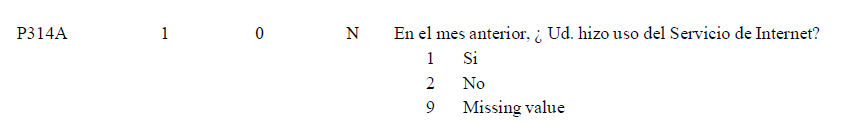

In [ ]:
generar_tabla_recuento(base_filtrada_aux, "p314d", "Ud., usa Internet al menos", True) #¿Ud., usa Internet al menos: 
# 1 Una vez al dia?
# 2 Una vez a la semana? 3 Una vez al mes? 4 Cada 2 meses o más?

## EQUIPO QUE UTILIZO PARA INGRESAR A INTERNET

### Acceso - Laptop

In [ ]:
generar_tabla_recuento(base_filtrada_aux, "i_laptop", "Uso del internet a traves de una LAPTOP", False)

### Acceso - Computadora

In [ ]:
generar_tabla_recuento(base_filtrada_aux, "i_computadora", "Uso del internet a traves de una computadora", False)

### Acceso - Tablet

In [ ]:
generar_tabla_recuento(base_filtrada_aux, "i_tablet", "Uso del internet a traves de una TABLET", False)

### Acceso - Otro

In [ ]:
generar_tabla_recuento(base_filtrada_aux, "i_otro", "Uso del internet a traves de una OTRO", False)

### Acceso - Celular sin plan de datos

In [ ]:
generar_tabla_recuento(base_filtrada_aux, "i_cel_sdatos", "Uso del internet a traves de una CELULAR SIN PLAN DE DATOS", False)

### Acceso - Celular con plan de datos

In [ ]:
generar_tabla_recuento(base_filtrada_aux, "i_cel_cdatos", "Uso del internet a traves de una CELULAR CON PLAN DE DATOS",False)

In [ ]:
#generar_tabla_recuento(base_filtrada_aux, "p314b1_5", "Uso del internet a traves de una CELULAR DE SU CENTRO DE TRABAJO", guardar_como_jpeg=True) 

## DIMENSION -APROPIACION - Para qué uso el internet

In [ ]:
generar_tabla_recuento(base_filtrada_aux, "i_obtener_info", "Usó el Internet para: Obtener información",False)

In [ ]:
generar_tabla_recuento(base_filtrada_aux, "i_comunicarse", "Usó el Internet para: Comunicarsen",False)

In [ ]:
generar_tabla_recuento(base_filtrada_aux, "i_comprar_pdts_ss", "Usó el Internet para: Comprar productos_servicios",False)

In [ ]:
generar_tabla_recuento(base_filtrada_aux,'i_operaciones_bancarias', 'Usó el Internet para: Operaciones de banca electrónica', False)


In [ ]:
generar_tabla_recuento(base_filtrada_aux, "i_edu_formal", "Usó el Internet para: Educación formal y actividades de capacitación",False)

In [ ]:
generar_tabla_recuento(base_filtrada_aux, "i_transacciones", "Usó el Internet para: Transacciones",False)

In [ ]:
generar_tabla_recuento(base_filtrada_aux, "i_act_entretenimiento", "Usó el Internet para: Actividades de entretenimiento",False)

In [ ]:
generar_tabla_recuento(base_filtrada_aux, "i_vender_pdts", "Usó el Internet para: Vender productos_servicios",False)

In [ ]:
generar_tabla_recuento(base_filtrada_aux, "i_descarga_antivirus", "Usó el Internet para: descarga de antivirus",False)

## CLASES A DISTANCIA

In [ ]:
# Cuenta los valores nulos en la columna "mi_columna"
nulos_en_columna = base_filtrada_aux['cl_medio_tv'].isnull().sum()

# Muestra el resultado
print("Cantidad de valores nulos en 'mi_columna':", nulos_en_columna)

In [ ]:
generar_tabla_recuento(base_filtrada_aux, "cl_medio_tv", "Acceso al contenido de clase - TELEVISION",False)

In [ ]:
generar_tabla_recuento(base_filtrada_aux, "cl_medio_radio", "Acceso al contenido de clase - RADIO",False)

In [ ]:
generar_tabla_recuento(base_filtrada_aux, "cl_medio_plataforma_virtual", "Acceso al contenido de clase - PLATAFORMA VIRTUAL",False)

In [ ]:
generar_tabla_recuento(base_filtrada_aux, "cl_medio_otro", "Acceso al contenido de clase - OTRO",False)

In [ ]:
generar_tabla_recuento(base_filtrada_aux, "cl_medio_wsp", "Acceso al contenido de clase - WHATSAPP",False)

In [ ]:
generar_tabla_recuento(base_filtrada_aux, "cl_medio_correo", "Acceso al contenido de clase - CORREO",False)

In [ ]:
generar_tabla_recuento(base_filtrada_aux, "cl_medio_llamadas", "Acceso al contenido de clase - LLAMADAS",False)

In [ ]:
generar_tabla_recuento(base_filtrada_aux, "cl_desarrollo_interaccion", "Acceso al contenido de clase - INTERACCION PROFESOR",False)

In [ ]:
generar_tabla_recuento(base_filtrada_aux, "cl_desarrollo_videos", "Acceso al contenido de clase - VIDEOS",False)

In [ ]:
generar_tabla_recuento(base_filtrada_aux, "cl_desarrollo_documentos", "Acceso al contenido de clase - DOCUMENTOS",False)

In [ ]:
generar_tabla_recuento(base_filtrada_aux, "cl_desarrollo_otros", "Acceso al contenido de clase - OTROS",False)

In [ ]:
generar_tabla_recuento(base_filtrada_aux, "cl_desarrollo_msm_audio", "Acceso al contenido de clase - MENSAJES DE AUDIO",False)

In [ ]:
generar_tabla_recuento(base_filtrada_aux, "cl_desarrollo_msm_texto", "Acceso al contenido de clase - MENSAJES DE TEXTO",False)

In [ ]:
generar_tabla_recuento(base_filtrada_aux, "cl_desarrollo_sin_acompañamiento", "Acceso al contenido de clase - SIN ACOMPAÑAMIENTO",False)

# Graficos

In [ ]:
base_filtrada.shape

## V. Continuas - Miembros por hogar , Edad y Años de escolaridad

In [ ]:
guardar_histograma_con_pesos(base_filtrada, 'mieperho','Miembros por hogar', 21)

In [ ]:
guardar_histograma_con_pesos(base_filtrada, 'Edad','Edad',12)

In [ ]:
guardar_histograma_con_pesos(base_filtrada, 'años_escolaridad','Años de escolaridad', 11)

## V. Cualitativas - Nivel educativo y centro de estudios

In [ ]:
base_filtrada_aux = base_filtrada.copy()

In [ ]:
label = ["Primaria","Secundaria"]
guardar_graf_barras(base_filtrada,'Nivel_educativo', labels = label)

In [ ]:
label = ["Privada", "Nacional"]
guardar_graf_barras(base_filtrada,'Centro_estudios', labels = label)
#label = ["Nacional","Privada"]

## V.C. Idioma y Sexo

In [ ]:
label = ["Otro","Castellano"]
guardar_graf_barras(base_filtrada,'Idioma', labels = label)

In [ ]:
label= ["Hombre","Mujer"]
guardar_graf_barras(base_filtrada,'Sexo', label)

## Area y Estrato Social

In [ ]:
label = ["Rural", "Urbano"]
guardar_graf_barras(base_filtrada,'Area', label)

In [ ]:
label = ["A", "B","C","D", "E","rural"]
guardar_graf_barras(base_filtrada,'estrsocial',label)

In [ ]:
label = ["Costa", "Sierra","Selva"]
guardar_graf_barras(base_filtrada,'Region',label)

In [ ]:
#label = ["1.Amazonas","2.Ancash","3.Apurímac","4.Arequipa","5.Ayacucho","6.Cajamarca","7.Callao","8.Cusco","9.Huancavelica","10.Huánuco", "11.Ica","12.Junín","13.La Libertad",
#         "14.Lambayeque","15.Lima","16.Loreto", "17.Madre de Dios","18.Moquegua","19.Pasco","20.Piura", "21.Puno","22.San Martín", "23.Tacna","24.Tumbes","25.Ucayali"]
#guardar_graf_barras(base_filtrada,'DEPARTAMENTO', label)

In [ ]:
label = ["No","Si"]
guardar_graf_barras(base_filtrada,'Electricidad', label)

In [ ]:
label = ["No","Si"]
guardar_graf_barras(base_filtrada, 'i_uso', label)

In [ ]:
label = ["No","Si"]
guardar_graf_barras(base_filtrada, 'i_conexion_hog', label)

In [ ]:
label = ["No","Si"]
guardar_graf_barras(base_filtrada, 'cel_hog', label)

In [ ]:
label = ["No","Si"]
guardar_graf_barras(base_filtrada, 'conexion_cable_hog', label)

In [ ]:
label = ["No","Si"]
guardar_graf_barras(base_filtrada, 'cel_uso', label)

## Grafico de barras - USO (Donde uso internet)

### Funcion

In [ ]:
i_uso        = barras(base_filtrada_aux, "i_uso"       ,"                                      Uso de internet")
i_uso_cedu   = barras(base_filtrada_aux,"i_uso_cedu"  ,"                                      Establecimiento educativo")
i_uso_trab   = barras(base_filtrada_aux,"i_uso_trab"  ,"                                      Trabajo")
i_uso_hog    = barras(base_filtrada_aux,"i_uso_hog"   ,"                                      Hogar")
i_uso_cab    = barras(base_filtrada_aux,"i_uso_cab"   ,"                                      Cabina pública")
i_uso_casotr = barras(base_filtrada_aux,"i_uso_casotr","                                     Casa de otra persona")
i_uso_otro   = barras(base_filtrada_aux,"i_uso_otro"  ,"                                     Otro")
i_uso_movil  = barras(base_filtrada_aux,"i_uso_movil" ,"                                     Acceso móvil a internet")

In [ ]:
i_uso_cedu

In [ ]:
data3 = pd.concat([i_uso_cedu, i_uso_trab, i_uso_hog, i_uso_cab, i_uso_casotr,i_uso_otro, i_uso_movil], axis=0)
data3 = data3.reset_index(drop=True)
#data3

### plot

In [ ]:
graf_multiples(data3, 'uso')

## Grafico de barras - ACCESO - Equipo de acceso de servicio de Internet

In [ ]:
i_computadora = barras(base_filtrada_aux, "i_computadora","                                          Computadora")
i_tablet      = barras(base_filtrada_aux, "i_tablet"     ,"                                          Tablet")
i_laptop      = barras(base_filtrada_aux, "i_laptop"     ,"                                          Laptop")
i_otro        = barras(base_filtrada_aux, "i_otro"       ,"                                         Otro")
i_cel_sdatos  = barras(base_filtrada_aux, "i_cel_sdatos" ,"                                         Celular sin plan de datos")
i_cel_cdatos  = barras(base_filtrada_aux, "i_cel_cdatos" ,"                                         Celular con plan de datos")

In [ ]:
data3 = pd.concat([i_computadora, i_tablet, i_laptop, i_otro, i_cel_sdatos, i_cel_cdatos], axis=0)
data3 = data3.reset_index(drop=True)
data3

### Plot

In [ ]:
graf_multiples(data3,'acceso')

## Grafico - Para qué uso el internet

In [ ]:
i_obtener_info         = barras(base_filtrada_aux, "i_obtener_info","Obtener información (sobre bienes y servicios, \n salud, organizaciones gubernamentales)")
i_comunicarse          = barras(base_filtrada_aux, "i_comunicarse", "Comunicarse (e-mail, chat, llamadas por Skype, \n WhatsApp, Facebook, Twitter, etc.)")
i_comprar_pdts_ss      = barras(base_filtrada_aux, "i_comprar_pdts_ss", "Comprar productos y/o servicios")
i_operaciones_bancarias = barras(base_filtrada_aux, "i_operaciones_bancarias", "Operaciones de banca electrónica \n y otros servicios financieros")
i_edu_formal          = barras(base_filtrada_aux, "i_edu_formal", "Educación formal y actividades \n de capacitación")
i_transacciones       = barras(base_filtrada_aux, "i_transacciones","Transacciones (interactuar) con organizaciones \n estatales/autoridades públicas")
i_act_entretenimiento = barras(base_filtrada_aux, "i_act_entretenimiento","Actividades de entretenimiento (juegos de video, \n obtener películas, música, videos, escuchar radio, \n leer periódico, etc.)")
i_vender_pdts         = barras(base_filtrada_aux, "i_vender_pdts", "Vender productos y/o servicios \n (Mercado Libre, OLX, Facebook, etc.)")
i_descarga_antivirus = barras(base_filtrada_aux,"i_descarga_antivirus", "Descarga de antivirus / aplicativos  \n /software(programas)")

In [ ]:
data3 = pd.concat([i_obtener_info, i_comunicarse,i_comprar_pdts_ss, i_operaciones_bancarias, i_edu_formal, i_transacciones,
                  i_act_entretenimiento, i_vender_pdts, i_descarga_antivirus], axis=0)
data3 = data3.reset_index(drop=True)
#data3

### Plot

In [ ]:
graf_multiples(data3,'apropiacion')

## Grafico de barras - Clases a DISTANCIA

In [ ]:
cl_medio_tv                 = barras(base_filtrada_aux, "cl_medio_tv"                , "                                  Televisión")
cl_medio_radio              = barras(base_filtrada_aux,"cl_medio_radio"             , "                                  Radio/equipo de sonido")
cl_medio_plataforma_virtual = barras(base_filtrada_aux, "cl_medio_plataforma_virtual", "                                  Plataforma virtual/página web")
cl_medio_otro               = barras(base_filtrada_aux,"cl_medio_otro"              , "                                  Otro")
cl_medio_wsp                = barras(base_filtrada_aux, "cl_medio_wsp"               , "                                  Whatsapp")
cl_medio_correo             = barras(base_filtrada_aux, "cl_medio_correo"            , "                                  Correo")
cl_medio_llamadas           = barras(base_filtrada_aux, "cl_medio_llamadas"          , "                                  Llamadas")

In [ ]:
data3 = pd.concat([cl_medio_tv, cl_medio_radio, cl_medio_plataforma_virtual, cl_medio_otro, cl_medio_wsp, cl_medio_correo, cl_medio_llamadas], axis=0)
data3 = data3.reset_index(drop=True)
#data3

### plot

In [ ]:
graf_multiples(data3,'clases_medio')

In [ ]:
cl_desarrollo_interaccion        = barras(base_filtrada_aux, "cl_desarrollo_interaccion"       , "                         Interacción con el profesor")
cl_desarrollo_videos             = barras(base_filtrada_aux,"cl_desarrollo_videos"            , "                         Videos")
cl_desarrollo_documentos         = barras(base_filtrada_aux, "cl_desarrollo_documentos"        , "                         Documentos (textos, cuadros, etc.)")
cl_desarrollo_otros              = barras(base_filtrada_aux, "cl_desarrollo_otros"             , "                         Otros")
cl_desarrollo_msm_audio          = barras(base_filtrada_aux, "cl_desarrollo_msm_audio"         , "                         Mensaje de Audio")
cl_desarrollo_msm_texto          = barras(base_filtrada_aux, "cl_desarrollo_msm_texto"         , "                         Mensaje de texto")
cl_desarrollo_sin_acompañamiento = barras(base_filtrada_aux, "cl_desarrollo_sin_acompañamiento", "                         Sin acompañamiento")

In [ ]:
data3 = pd.concat([cl_desarrollo_interaccion, cl_desarrollo_videos, cl_desarrollo_documentos, cl_desarrollo_otros, cl_desarrollo_msm_audio, cl_desarrollo_msm_texto,
                   cl_desarrollo_sin_acompañamiento], axis=0)
data3 = data3.reset_index(drop=True)
#data3

### Plot

In [ ]:
graf_multiples(data3,'medio_desarrollo')

# Regresión

In [ ]:
base_filtrada['i_uso'].value_counts()
missing_values = base_filtrada['i_uso'].isna().sum()
print("Número de valores faltantes en 'i_uso_hog':", missing_values)

In [ ]:
base_filtrada = base_filtrada[base_filtrada["estrsocial"] != 6]

In [ ]:
base_filtrada.estrsocial.value_counts()

In [ ]:
#base_filtrada.columns

In [ ]:
base_filtrada.shape

In [ ]:
base_filtrada.i_uso.value_counts()

## Variables Y X

In [ ]:
# Define la variable dependiente (binaria) y las variables independientes
y = base_filtrada['i_uso']
X = base_filtrada[['Sexo', 'Edad','años_escolaridad','mieperho', 
                   'cel_uso',
                   'Electricidad', 'Idioma','Centro_estudios'
                   #,'Area'
                  ]]
weights = base_filtrada['factor07']

In [ ]:
base_filtrada['i_uso'].value_counts()

In [ ]:
base_filtrada['cel_uso'].value_counts()

In [ ]:
#base_filtrada['Area'].value_counts()

In [ ]:
base_filtrada['cel_uso'].value_counts()
missing_values = base_filtrada['cel_uso'].isna().sum()
print("Número de valores faltantes en 'i_uso_hog':", missing_values)

### Dummies

In [ ]:
# Codifica la variable categórica nominal "Region" en variables dummy
estrato_social_dummies = pd.get_dummies(base_filtrada['estrsocial'], prefix='estrsocial', drop_first=True)

# Codifica la variable categórica ordinal "Nivel_educativo" en variables dummy
#nivel_educativo_dummies = pd.get_dummies(base_filtrada['Nivel_educativo'], prefix='Nivel_educativo', drop_first=True)

# Codifica la variable categórica nominal "Region" en variables dummy
region_dummies = pd.get_dummies(base_filtrada['Region'], prefix='Region', drop_first=True)

# Codifica la variable categórica nominal "Region" en variables dummy
departamento_dummies= pd.get_dummies(base_filtrada['DEPARTAMENTO'], prefix='DEPARTAMENTO', drop_first=False)
departamento_dummies = departamento_dummies.drop(columns=['DEPARTAMENTO_15'])

# Combina las variables dummy con el conjunto de variables independientes
X = pd.concat([X, region_dummies
               , estrato_social_dummies
               ,departamento_dummies
              ], axis=1)

In [ ]:
X.head()

In [ ]:
#X["Nivel_educativo_2.0"].value_counts(normalize=True)  #PRIMARIA
#X["Nivel_educativo_3.0"].value_counts(normalize=True) # SECUNDARIA

## Regresión Lineal SIMPLE

In [ ]:
# Agregar una constante al conjunto de datos (intercepto)
X = sm.add_constant(X)
model_linear = sm.OLS(y, X,weights=weights)
results_linear = model_linear.fit()
print(results_linear.summary())

## Modelo Probit

In [ ]:
model_probit = sm.Probit(y, X, weights=weights)
results_probit = model_probit.fit()
print(results_probit.summary())

# Calcula los efectos marginales
efectos_marginales = results_probit.get_margeff()

# Abre un archivo LaTeX para escribir el output
with open('efectos_marginales.tex', 'w') as f:
    f.write(efectos_marginales.summary().as_latex())
        
print(efectos_marginales.summary())

In [ ]:
modelo_seleccion = sm.Probit(y, X).fit()

# Calcular las probabilidades estimadas de pertenecer a la clase positiva
probabilidades_seleccion = modelo_seleccion.predict(X)

# Ecuación de resultado (probit)
X_resultado = X
y_resultado = y

# Calcular los residuos de la ecuación de resultado
residuos_resultado = y_resultado - probabilidades_seleccion

# Agregar los residuos como una nueva columna
X_resultado['residuos_seleccion'] = residuos_resultado

# Estimar el modelo de resultado
modelo_resultado = sm.Probit(y_resultado, X_resultado).fit()

In [ ]:
#residuos_seleccion = model_probit.predict(X) - y

## LOGIT

In [ ]:
X.head()

In [ ]:
y.info()

In [ ]:
base_filtrada.shape

In [ ]:
base_filtrada_aux.shape